In [54]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

df = pd.read_excel("dataset.xlsx")

In [55]:
df.head(2)

,Affluence,Capacite,Journee,Jours,Date,Heure,Domicile,Resultat,exterieur,Derby,Victoire_dom,Dom_plac_joun,ext_plac_joun,Dom_plac_final,ext_plac_final
0,24551,50000,1,sam,1989-07-21,20:30,Olympique de lyonnais,1-4,Olympique de Marseille,1,42.1,18,1,8,1
1,15572,50000,2,ven,1989-07-29,20:30,Olympique de lyonnais,3-0,Toulouse FC,0,42.1,7,8,8,9


In [56]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
import time

le = LabelEncoder()

df['Jours_label'] = le.fit_transform(df.Jours)
df['exterieur_label'] = le.fit_transform(df.exterieur)
df['Domicile_label'] = le.fit_transform(df.Domicile)
df['Capacite_label'] = le.fit_transform(df.Capacite)
df['Heure_label'] = le.fit_transform(df.Heure)

In [57]:
X = df.drop(['Jours', 'exterieur', 'Capacite', 'Affluence','Date','Heure','Domicile','Resultat'], axis = 1)
y = df.Affluence

In [58]:
X[:10]

,Journee,Derby,Victoire_dom,Dom_plac_joun,ext_plac_joun,Dom_plac_final,ext_plac_final,Jours_label,exterieur_label,Domicile_label,Capacite_label,Heure_label
0,1,1,42.1,18,1,8,1,4,36,0,6,15
1,2,0,42.1,7,8,8,9,5,49,0,6,15
2,4,0,42.1,8,13,8,18,5,35,0,6,15
3,6,0,42.1,9,4,8,4,5,25,0,6,15
4,8,0,42.1,13,14,8,19,3,41,0,6,15
5,10,0,42.1,14,18,8,17,5,32,0,6,15
6,12,0,42.1,6,16,8,16,5,45,0,6,15
7,14,0,42.1,13,7,8,3,4,4,0,6,15
8,16,0,42.1,9,2,8,2,5,27,0,6,15
9,18,0,42.1,7,17,8,20,3,22,0,6,15


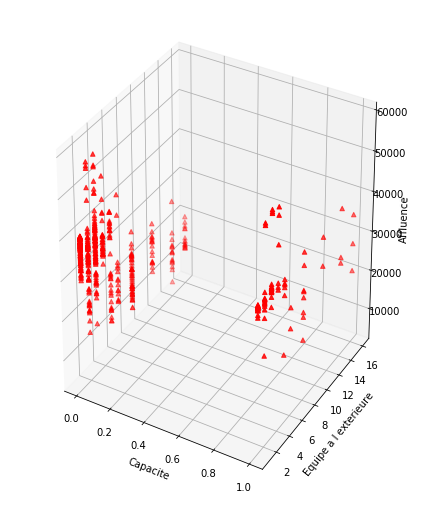

In [59]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1,2,1, projection="3d")
ax.scatter(df["Derby"], df["Dom_plac_final"], df["Affluence"], c='r', marker='^')
 
ax.set_xlabel('Capacite')
ax.set_ylabel('Equipe a l exterieure')
ax.set_zlabel('Affluence')
 
plt.show()

In [60]:
#Normalisation des données et feature Scaling
ss = StandardScaler()
Xscaled = ss.fit_transform(X)

In [61]:
Xscaled

array([[-1.69170458,  2.41566617, -1.48710694, ...,  0.        ,
         1.2634983 ,  0.36539163],
       [-1.59978261, -0.41396448, -1.48710694, ...,  0.        ,
         1.2634983 ,  0.36539163],
       [-1.41593869, -0.41396448, -1.48710694, ...,  0.        ,
         1.2634983 ,  0.36539163],
       ...,
       [ 1.43364218, -0.41396448,  0.28412086, ...,  0.        ,
         1.71355706, -1.80525169],
       [ 1.52556414, -0.41396448,  0.28412086, ...,  0.        ,
         1.71355706, -2.02231602],
       [ 1.70940807, -0.41396448,  0.28412086, ...,  0.        ,
         1.71355706,  1.23364895]])

In [62]:
import statsmodels.api as sm
est = sm.OLS(y, X).fit()
 
print (est.summary())

                            OLS Regression Results                            
Dep. Variable:              Affluence   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     712.8
Date:                Mon, 16 Jul 2018   Prob (F-statistic):          7.55e-309
Time:                        12:07:30   Log-Likelihood:                -5635.9
No. Observations:                 540   AIC:                         1.129e+04
Df Residuals:                     529   BIC:                         1.134e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Journee           129.2635     34.648     

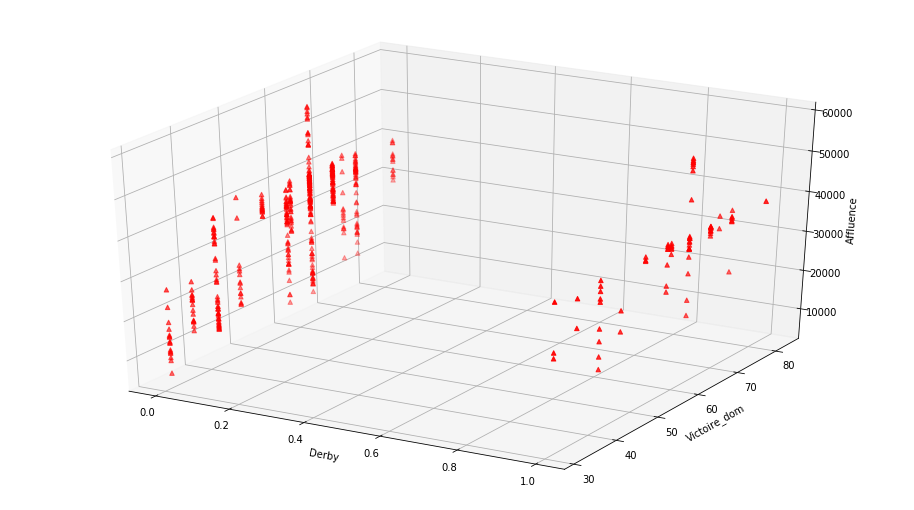

In [68]:

fig = plt.figure(figsize=(16,9))
#use this line to print only one figure
ax = fig.add_subplot(1,1,1, projection="3d")
ax.scatter(df["Derby"], df["Victoire_dom"], df["Affluence"], c='r', marker='^')

ax.set_xlabel('Derby')
ax.set_ylabel('Victoire_dom')
ax.set_zlabel('Affluence')

frst_col_Capacite =  df.iloc[0:len(df),1] #selection de la première colonne de notre dataset
scnd_col_Importance =  df.iloc[0:len(df),9]
third_col_Affluences = df.iloc[0:len(df),0]

def predict_attence_of_match(temps,classico,ttp,journee,Dom_plac_joun,Domicile_lab):
    return 7166.4173 * temps + 431.9952  * classico + 237.6936 * ttp + 129.2635 * journee + 88.4864 * Dom_plac_joun + 1.029e-14  * Domicile_lab  

def predict_all(Ltemps, Lexterieur,Lttp,Ljournee):
    predicted_attendance = []
    for n in range(0, len(Y)):
        predicted_attendance.append(predict_attence_of_match(Ltemps[n], Lexterieur[n],Lttp[n],Ljournee[n]))
    return predicted_attendance


# set up the axes for the second plot
#ax = fig.add_subplot(1, 2, 2, projection=’3d’)

#ax.plot_trisurf(df["Derby"], df["Victoire_dom"],df["Heure_label"], predict_all(df["Derby"], df["Victoire_dom"],df["Heure_label"]))

plt.show()

In [69]:
lin_model = OLS(y, X).fit()

In [71]:
#Predict Derby, pourcentage_victoire_annee, Heure,journee 
print (predict_attence_of_match(1,68,15,10,100,1))

50248.76990000001


In [73]:
lin_pred = lin_model.predict(X)
lin_model_score = r2_score(y, lin_pred)

print ("R^2 score:", lin_model_score)

R^2 score: 0.2946696093500105
